# Assignment 3

## About Data: 

Dataset from:  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/ 

test set: optdigits.tes  
training set: optdigits.tra 

Create the following training datasets from the optdigits.tra set: 

1. Dataset 1: X100_C69: Randomly chosen N=100 instances from class 6 and randomly chosen N=100 instances from class 9.  
2. Dataset 2: X500_C69: similar to X100_C69, but for N=500.
3. Dataset 3: X100_CAll : Randomly chosen N=100 instances from each of the classes.  
4. Dataset 4: X500_CAll : similar to X500_C69, but for N=500. 

Note that when you use X100_C69 or X500_69 for training, for testing, you should only use the instances that belong to classes 6 and 9 in the test set optdigits.tes. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import io

In [2]:
# Load data from required files
def load_data(filename):
    with open(filename, "r") as file:
        data_string = file.read()
    data = io.StringIO(data_string)
    colnames = [i for i in range(1,66)]
    df = pd.read_csv(data, index_col=False, names=colnames, sep=",")
    return df

In [3]:
# Create training datasets 
X = load_data("optdigits.tra")
X_C69 = X[X[65].isin([6,9])]
X100_C69 = X_C69.groupby([65]).apply(lambda grp: grp.sample(n=100)).reset_index(drop=True)
X100_CALL = X.groupby([65]).apply(lambda grp: grp.sample(n=100)).reset_index(drop=True)
X500_C69 = X_C69.groupby([65]).apply(lambda grp: grp.sample(n=500, replace=True)).reset_index(drop=True)
X500_CALL = X.groupby([65]).apply(lambda grp: grp.sample(n=500, replace=True)).reset_index(drop=True)

In [4]:
# Create testing datasets
test_df = load_data("optdigits.tes")
test_df_C69 = test_df[test_df[65].isin([6,9])]

In [5]:
X_train1, y_train1 = X100_C69.loc[:, 1:64], X100_C69[65]
X_test1, y_test1 = test_df_C69.loc[:, 1:64], test_df_C69[65]

In [6]:
X_train2, y_train2 = X500_C69.loc[:, 1:64], X500_C69[65]
X_test2, y_test2 = test_df_C69.loc[:, 1:64], test_df_C69[65]

In [7]:
X_train3, y_train3 = X100_CALL.loc[:, 1:64], X100_CALL[65]
X_test3, y_test3 = test_df.loc[:, 1:64], test_df[65]

In [8]:
X_train4, y_train4 = X500_CALL.loc[:, 1:64], X500_CALL[65]
X_test4, y_test4 = test_df.loc[:, 1:64], test_df[65]

### Q1 [2.5pts]: Decision Trees, classification: Use sklearn.tree library’s DecisionTreeClassifier algorithm. For the DecisionTreeClassifier determine the value of the tree depth parameter (experiment with depth=2, 3, 5, 10) that results in the best test error for each of the 4 training data sets you created. How does the best depth value change as the number of instances and classes change? 

In [9]:
# Function to create decision tree classifier model, fit the model, predict the class and calculate error rate of the model
# Returns list of error rates for models with depths 2, 3, 5, and 10
def model_Decision_Tree_Classifier(X_train, y_train, X_test, y_test, data):
    errors = []
    for depth_val in [2,3,5,10]:
        print("Depth value:", depth_val)
        dt_classifier = DecisionTreeClassifier(max_depth=depth_val)
        dt_classifier = dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        errors.append(1 - metrics.accuracy_score(y_test, y_pred))
        print("Error rate:", errors[-1])
#         plot_Decision_Tree(dt_classifier, depth_val, data)
    return errors

In [10]:
# def plot_Decision_Tree(dt_classifier, i, data):
#     dot_data = export_graphviz(dt_classifier, feature_names=range(1,65), out_file=None,
#                            filled=True, rounded=True, special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     nodes = graph.get_node_list()
#     graph.write_png('decision_tree_' + str(data) + '_depth' + str(i) + '.png')
#     image = Image(graph.create_png())
#     display(image)

#### Dataset 1: X100_C69: Randomly chosen N=100 instances from class 6 and randomly chosen N=100 instances from class 9.

In [11]:
errors1 = model_Decision_Tree_Classifier(X_train1, y_train1, X_test1, y_test1, 'dataset1')

Depth value: 2
Error rate: 0.011080332409972304
Depth value: 3
Error rate: 0.011080332409972304
Depth value: 5
Error rate: 0.011080332409972304
Depth value: 10
Error rate: 0.011080332409972304


#### Dataset 2: X500_C69: similar to X100_C69, but for N=500.

In [12]:
errors2 = model_Decision_Tree_Classifier(X_train2, y_train2, X_test2, y_test2, 'dataset2')

Depth value: 2
Error rate: 0.008310249307479256
Depth value: 3
Error rate: 0.008310249307479256
Depth value: 5
Error rate: 0.008310249307479256
Depth value: 10
Error rate: 0.008310249307479256


#### Dataset 3: X100_CAll : Randomly chosen N=100 instances from each of the classes.

In [13]:
errors3 = model_Decision_Tree_Classifier(X_train3, y_train3, X_test3, y_test3, 'dataset3')

Depth value: 2
Error rate: 0.7384529771841959
Depth value: 3
Error rate: 0.5998887033945465
Depth value: 5
Error rate: 0.32276015581524764
Depth value: 10
Error rate: 0.19254312743461321


#### Dataset 4: X500_CAll : similar to X500_C69, but for N=500.

In [14]:
errors4 = model_Decision_Tree_Classifier(X_train4, y_train4, X_test4, y_test4, 'dataset4')

Depth value: 2
Error rate: 0.7033945464663327
Depth value: 3
Error rate: 0.6199220923761826
Depth value: 5
Error rate: 0.31775180856983865
Depth value: 10
Error rate: 0.14802448525319978


#### Plot error rate for each model for each dataset

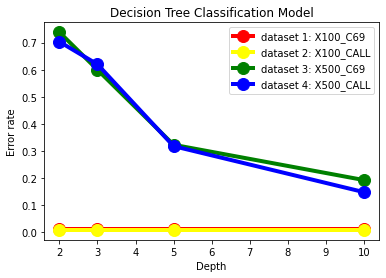

In [15]:
depths = [2,3,5,10]
plt.plot(depths, errors1, label = 'dataset 1: X100_C69', marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot(depths, errors2, label = 'dataset 2: X100_CALL', marker='o', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=4)
plt.plot(depths, errors3, label = 'dataset 3: X500_C69', marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(depths, errors4, label = 'dataset 4: X500_CALL', marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.xlabel('Depth')
plt.ylabel('Error rate')
plt.title('Decision Tree Classification Model')
plt.legend()

### Q2 [2.5pts]: Nonparametric Classification: Use sklearn.tree library’s KneighborsClassifier algorithm. For the KneighborsClassifier determine the value of the best k parameter (experiment with k=1, 3, 5, 9) that results in the best test error for each of the 4 training data sets you created. How does the best k value change as the number of instances and classes change?  

In [16]:
# Function to create kNN model, fit the model, predict the class and calculate error rate of the model
# Returns list of error rates for models with number of neighbours 1, 3, 5, and 9
def model_KNN(X_train, y_train, X_test, y_test):
    errors = []
    for neighbour_vals in [1,3,5,9]:
        print("Number of neighbours:", neighbour_vals)
        knn_classifier = KNeighborsClassifier(n_neighbors=neighbour_vals)
        knn_classifier = knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        errors.append(1 - metrics.accuracy_score(y_test, y_pred))
        print("Error rate:", errors[-1])
    return errors

#### Dataset 1: X100_C69: Randomly chosen N=100 instances from class 6 and randomly chosen N=100 instances from class 9.

In [17]:
knn_errors1 = model_KNN(X_train1, y_train1, X_test1, y_test1)

Number of neighbours: 1
Error rate: 0.0
Number of neighbours: 3
Error rate: 0.0
Number of neighbours: 5
Error rate: 0.0
Number of neighbours: 9
Error rate: 0.0


#### Dataset 2: X500_C69: similar to X100_C69, but for N=500.

In [18]:
knn_errors2 = model_KNN(X_train2, y_train2, X_test2, y_test2)

Number of neighbours: 1
Error rate: 0.0
Number of neighbours: 3
Error rate: 0.0
Number of neighbours: 5
Error rate: 0.0
Number of neighbours: 9
Error rate: 0.0


#### Dataset 3: X100_CAll : Randomly chosen N=100 instances from each of the classes.

In [19]:
knn_errors3 = model_KNN(X_train3, y_train3, X_test3, y_test3)

Number of neighbours: 1
Error rate: 0.03005008347245408
Number of neighbours: 3
Error rate: 0.03394546466332782
Number of neighbours: 5
Error rate: 0.036727879799666074
Number of neighbours: 9
Error rate: 0.036727879799666074


#### Dataset 4: X500_CAll : similar to X500_C69, but for N=500.

In [20]:
knn_errors4 = model_KNN(X_train4, y_train4, X_test4, y_test4)

Number of neighbours: 1
Error rate: 0.01947690595436835
Number of neighbours: 3
Error rate: 0.023928770172509717
Number of neighbours: 5
Error rate: 0.023372287145242088
Number of neighbours: 9
Error rate: 0.024485253199777457


#### Plot error rate for each model for each dataset

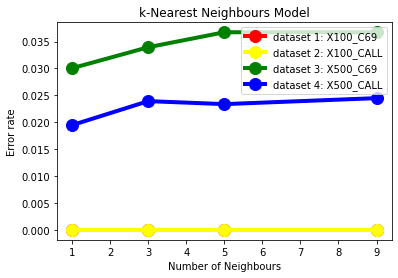

In [21]:
neighbours = [1,3,5,9]
plt.plot(neighbours, knn_errors1, label = 'dataset 1: X100_C69', marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot(neighbours, knn_errors2, label = 'dataset 2: X100_CALL', marker='o', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=4)
plt.plot(neighbours, knn_errors3, label = 'dataset 3: X500_C69', marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(neighbours, knn_errors4, label = 'dataset 4: X500_CALL', marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.xlabel('Number of Neighbours')
plt.ylabel('Error rate')
plt.title('k-Nearest Neighbours Model')
plt.legend()

### Q3 [2.5pts]: Decision Trees, regression for digit completion: Using only the data in X500_69 for training, use the first 48 features as inputs and predict the next 16 features, i.e. create 16 decision tree regression models, using the sklearn library. Report the test error (use only the instances from classes 6 and 9) for each of the 16 regression models. Which pixels are easier to predict?
(Clarification, each of your models will have the same set of features, namely features 1…48.)

In [22]:
# Function to create decision tree regressor model, fit the model, predict the 16 features and calculate error rate of the model
# Returns list of error rates for each of the 16 features
def model_Decision_Tree_Regressor(X_train, y_train, X_test, y_test):
    test_error = {}
    dt_regressor = DecisionTreeRegressor(random_state=0)
    for col in y_train.columns:
        print("Column", col)
        dt_regressor = dt_regressor.fit(X_train, y_train[col])
        y_pred = dt_regressor.predict(X_test)
        test_error[col] = 1 - metrics.accuracy_score(y_test[col], y_pred)
        print("Test error rate:", test_error[col])
#         plot_Decision_Tree_Regressor(dt_regressor, col)
    return test_error

In [23]:
# def plot_Decision_Tree_Regressor(dt_regressor, col):
#     dot_data = export_graphviz(dt_regressor, feature_names=range(1,49), out_file=None,
#                            filled=True, rounded=True, special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     nodes = graph.get_node_list()
#     graph.write_png('decision_tree_regressor_column' + str(col) + '.png')
#     image = Image(graph.create_png())
#     display(image)

In [24]:
X_train, y_train = X500_C69.loc[:, 1:48], X500_C69.loc[:, 49:64]
X_test, y_test = test_df_C69.loc[:, 1:48], test_df_C69.loc[:, 49:64]

In [25]:
test_err = model_Decision_Tree_Regressor(X_train, y_train, X_test, y_test)

Column 49
Test error rate: 0.0
Column 50
Test error rate: 0.2936288088642659
Column 51
Test error rate: 0.8199445983379501
Column 52
Test error rate: 0.8227146814404432
Column 53
Test error rate: 0.8808864265927978
Column 54
Test error rate: 0.8393351800554016
Column 55
Test error rate: 0.7340720221606648
Column 56
Test error rate: 0.1634349030470914
Column 57
Test error rate: 0.0
Column 58
Test error rate: 0.06925207756232687
Column 59
Test error rate: 0.6675900277008311
Column 60
Test error rate: 0.8254847645429363
Column 61
Test error rate: 0.6952908587257618
Column 62
Test error rate: 0.850415512465374
Column 63
Test error rate: 0.7119113573407202
Column 64
Test error rate: 0.1246537396121884


#### The 16 columns in the order of their increasing error rates or in the order of ease of prediction are as follows: 

In [26]:
{k: v for k, v in sorted(test_err.items(), key=lambda item: item[1])}

{49: 0.0,
 57: 0.0,
 58: 0.06925207756232687,
 64: 0.1246537396121884,
 56: 0.1634349030470914,
 50: 0.2936288088642659,
 59: 0.6675900277008311,
 61: 0.6952908587257618,
 63: 0.7119113573407202,
 55: 0.7340720221606648,
 51: 0.8199445983379501,
 52: 0.8227146814404432,
 60: 0.8254847645429363,
 54: 0.8393351800554016,
 62: 0.850415512465374,
 53: 0.8808864265927978}

#### Plot error rate for each of the 16 columns

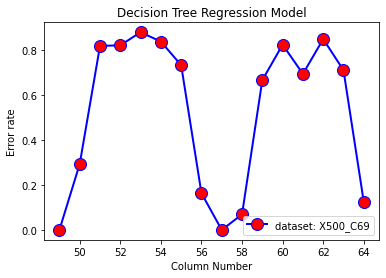

In [27]:
plt.plot(list(test_err.keys()), list(test_err.values()), label = 'dataset: X500_C69', marker='o', markerfacecolor='red', markersize=12, color='blue', linewidth=2)
plt.xlabel('Column Number')
plt.ylabel('Error rate')
plt.title('Decision Tree Regression Model')
plt.legend()